In [5]:
#%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
import math

In [6]:
n = 10.
b = 8
s = 15.

In [7]:
def GetLnQ(n_,b_,s_,mu_):
    
    Q = 2.*(mu_*s_ - n_*np.log(1.+(mu_*s_/b_)))
    
    return Q

In [8]:
q = GetLnQ(n,b,s,0.59)
print(q)

2.8018176976293017


In [9]:
def Sampler(n_,b_,s_,mu_,N=int(1e5)):
    
    H0 = np.random.poisson(b_, N)
    H1 = np.random.poisson(b_+mu_*s_,N)
    
    Obs = GetLnQ(n_,b_,s_,mu_)
    
    q0 = GetLnQ(H0,b_,s_,mu_)
    q1 = GetLnQ(H1,b_,s_,mu_)
    
    return Obs, q0, q1

In [24]:
def GetHisto(l_,bins_, norm=True):
    
    H1, bines = np.histogram(l_,bins=bins_)
    w = np.diff(bines)
    
    if norm:
        H1 = H1 / (np.sum(H1*w))
    
    return H1,bines,w

In [45]:
def GetMethod(n_,b_,s_,mu_,N=int(1e5)):
    
    Obs, q0, q1 = Sampler(n_,b_,s_,mu_)
    
    bins = np.linspace(-50,50,200)
    
    Hq0, bq0, wq0 = GetHisto(q0,bins,True)
    Hq1, bq1, wq1 = GetHisto(q1,bins,True)
    
    
    #plt.plot(bq0[0:-1],Hq0, color='k')
    plt.bar(bq0[0:-1],Hq0,width=wq0, color='b',ec='k')
    plt.bar(bq1[0:-1],Hq1,width=wq1, color='r',ec='k')
    
    #plt.yscale('log')

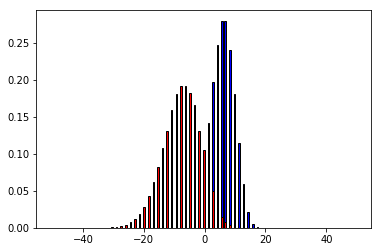

In [46]:
GetMethod(n,b,s,0.59)